In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df.shape

(60000, 785)

In [3]:
df.sample()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
21715,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


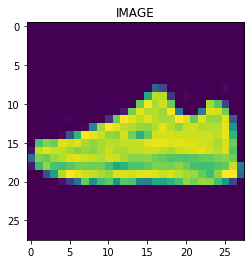

In [4]:
plt.imshow(df.iloc[6160,1:].values.reshape(28,28))
plt.title('IMAGE')
plt.show()

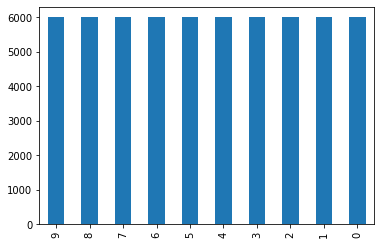

In [5]:
df['label'].value_counts().plot.bar()

In [6]:
X=df.drop(['label'],axis=1)
Y=df['label'].copy()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
print(f"{len(X_train)} {len(Y_train)}")
print(f"{len(X_test)} {len(Y_test)}")

42000 42000
18000 18000


In [7]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,-0.601712,-0.476945,-0.395154,-0.406441,-0.440185,-0.396719,-0.287717,-0.158258,-0.091432,-0.033046
1,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,-0.601712,-0.476945,-0.395154,-0.406441,-0.440185,-0.396719,-0.287717,-0.158258,-0.091432,-0.033046
2,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,0.198798,-0.238546,-0.377959,...,-0.601712,-0.476945,-0.395154,0.275910,0.389449,-0.396719,-0.287717,-0.158258,-0.091432,-0.033046
3,-0.009505,-0.022693,-0.028907,0.366132,0.406799,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,-0.549579,-0.476945,-0.395154,-0.406441,-0.440185,-0.374570,-0.287717,-0.158258,-0.091432,-0.033046
4,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,-0.601712,-0.476945,-0.395154,-0.406441,-0.440185,-0.396719,-0.287717,-0.158258,-0.091432,-0.033046


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# model=LogisticRegression(multi_class='ovr')
model=RandomForestClassifier()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)

1.0

In [9]:
Y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(Y_test,Y_pred)
print(score)
cf=classification_report(Y_test,Y_pred)
print(cf)

0.8788888888888889
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1783
           1       0.99      0.96      0.98      1795
           2       0.78      0.83      0.80      1814
           3       0.86      0.92      0.89      1822
           4       0.77      0.83      0.80      1805
           5       0.96      0.96      0.96      1738
           6       0.74      0.57      0.65      1846
           7       0.94      0.94      0.94      1841
           8       0.96      0.98      0.97      1762
           9       0.96      0.96      0.96      1794

    accuracy                           0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000



In [11]:
X1=X.copy()
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X1=pd.DataFrame(pca.fit_transform(X1))
X1.head()

,0,1
0,10.664973,14.993363
1,-11.989748,11.812770
2,20.517671,1.579784
3,9.634535,-6.790917
4,11.493442,-11.655488


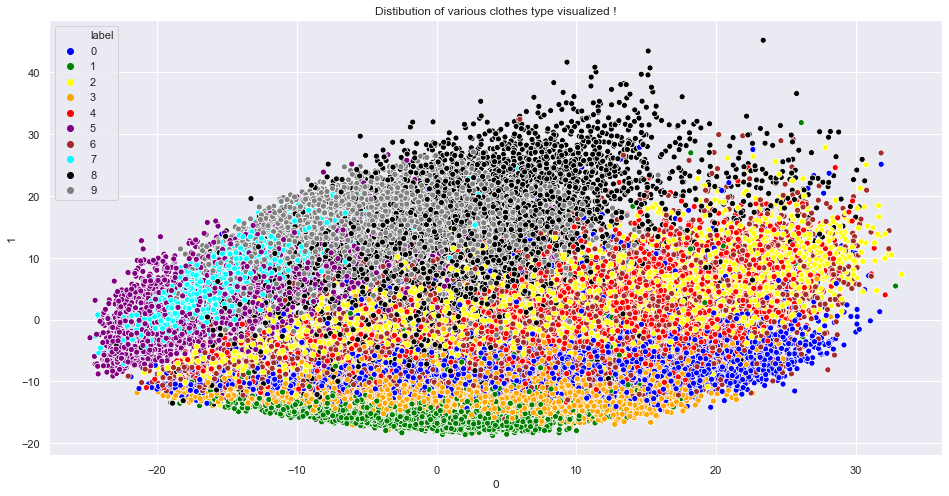

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)})
sns.scatterplot(X1[0],X1[1],data=df,hue=Y,palette=['blue','green','yellow','orange','red','purple','brown','cyan','black','grey'])
plt.title('Distibution of various clothes type visualized !')
plt.show()

In [13]:
X.shape

(60000, 784)

In [14]:
X2=X.copy()
X2.shape

(60000, 784)

In [15]:
pca = PCA(n_components=None)
X2=pca.fit_transform(X2)

In [16]:
pca.explained_variance_ratio_

array([2.20571756e-01, 1.43955630e-01, 5.45880247e-02, 5.11639916e-02,
       4.06927261e-02, 3.01215416e-02, 2.75048141e-02, 2.32587135e-02,
       1.69443848e-02, 1.30983264e-02, 1.16148766e-02, 9.63108500e-03,
       8.90642283e-03, 8.56623265e-03, 7.43049170e-03, 7.30156875e-03,
       6.57498446e-03, 6.32691746e-03, 6.23657324e-03, 5.80460273e-03,
       5.15706856e-03, 5.11548127e-03, 4.72763859e-03, 4.53556766e-03,
       4.38423049e-03, 4.16784360e-03, 3.95056056e-03, 3.93244091e-03,
       3.78355333e-03, 3.74477525e-03, 3.68527515e-03, 3.53645703e-03,
       3.36422428e-03, 3.30014901e-03, 3.29434140e-03, 3.19736435e-03,
       3.05998866e-03, 2.93713849e-03, 2.89202828e-03, 2.80917977e-03,
       2.71997701e-03, 2.65985976e-03, 2.55731803e-03, 2.53773458e-03,
       2.45191331e-03, 2.43254210e-03, 2.38719727e-03, 2.28125579e-03,
       2.23339437e-03, 2.15709293e-03, 2.12644914e-03, 2.09084797e-03,
       2.02279863e-03, 2.01541148e-03, 1.99305410e-03, 1.95331580e-03,
      

In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.22057176, 0.36452739, 0.41911541, 0.4702794 , 0.51097213,
       0.54109367, 0.56859848, 0.5918572 , 0.60880158, 0.62189991,
       0.63351478, 0.64314587, 0.65205229, 0.66061853, 0.66804902,
       0.67535059, 0.68192557, 0.68825249, 0.69448906, 0.70029366,
       0.70545073, 0.71056621, 0.71529385, 0.71982942, 0.72421365,
       0.72838149, 0.73233205, 0.7362645 , 0.74004805, 0.74379282,
       0.7474781 , 0.75101456, 0.75437878, 0.75767893, 0.76097327,
       0.76417064, 0.76723062, 0.77016776, 0.77305979, 0.77586897,
       0.77858895, 0.78124881, 0.78380613, 0.78634386, 0.78879577,
       0.79122832, 0.79361551, 0.79589677, 0.79813016, 0.80028726,
       0.8024137 , 0.80450455, 0.80652735, 0.80854276, 0.81053582,
       0.81248913, 0.8143993 , 0.81625708, 0.81807303, 0.81985567,
       0.8216133 , 0.82334858, 0.82505845, 0.8267345 , 0.82834804,
       0.82992236, 0.83146892, 0.83297883, 0.83446632, 0.83593097,
       0.83737537, 0.83880726, 0.84023284, 0.8416355 , 0.84300

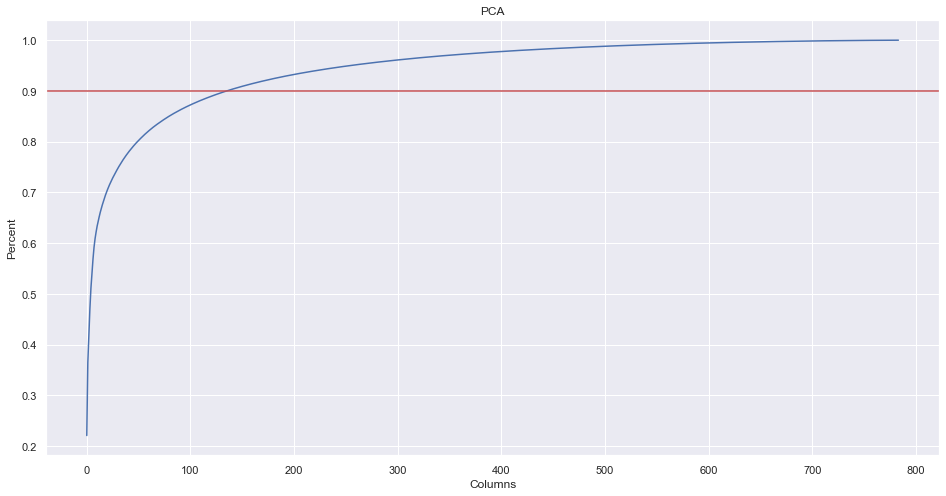

In [20]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.xlabel('Columns')
plt.ylabel('Percent')
plt.title('PCA')
plt.show()

In [22]:
from sklearn.decomposition import PCA
pca=PCA(n_components=140)
X=pd.DataFrame(pca.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,10.664973,14.993363,-0.689468,-10.980911,4.788254,0.559623,2.141115,-2.582798,-4.525374,-0.758684,...,-1.634575,0.674965,0.342933,1.265734,-0.842943,0.553692,-0.006632,-1.064193,-0.154723,0.950158
1,-11.989748,11.812770,-5.801049,-3.418629,-4.630650,2.061772,-3.109565,-3.308504,-4.461982,5.669063,...,-0.526230,-1.133020,-1.099272,0.458799,-0.316246,0.230052,0.131700,-0.507705,0.100621,-0.430027
2,20.517671,1.579784,6.770122,-2.884371,-5.379185,2.618096,-0.246181,-2.936941,3.415351,-1.236732,...,0.744080,-0.026633,-0.009304,0.012364,0.046878,-0.126009,-0.537097,0.101088,0.178041,-0.746386
3,9.634535,-6.790917,-0.907860,4.577228,8.377438,-0.094376,-8.672806,-0.604500,-2.566944,-3.070937,...,1.756529,-1.092353,-0.394529,-0.594761,0.470960,-0.755358,0.433277,0.200290,0.917305,0.580991
4,11.493442,-11.655488,-7.208334,-4.772964,-0.594114,0.553685,0.388620,-0.384219,2.063609,-4.824827,...,0.268792,0.038146,0.383442,0.138523,0.542730,-0.156279,0.088282,1.276620,0.666072,0.149072


In [23]:
Y=df['label'].copy()
print(Y.shape)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
print(f"{len(X_train)} {len(Y_train)}")
print(f"{len(X_test)} {len(Y_test)}")

(60000,)
42000 42000
18000 18000


In [24]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)

1.0

In [25]:
Y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(Y_test,Y_pred)
print(score)
cf=classification_report(Y_test,Y_pred)
print(cf)

0.865
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1783
           1       0.99      0.95      0.97      1795
           2       0.79      0.81      0.80      1814
           3       0.85      0.91      0.88      1822
           4       0.76      0.81      0.79      1805
           5       0.92      0.93      0.92      1738
           6       0.74      0.57      0.64      1846
           7       0.93      0.91      0.92      1841
           8       0.93      0.96      0.95      1762
           9       0.93      0.95      0.94      1794

    accuracy                           0.86     18000
   macro avg       0.86      0.87      0.86     18000
weighted avg       0.86      0.86      0.86     18000

